# HR prediction

### This is a problem statement where we need to predict whether the person can be retained or not.

## Data Analysis

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
pd.set_option("display.max_columns",100)
import warnings
warnings.filterwarnings('ignore')

In [72]:
data_frame=pd.read_csv('hr_data.csv')

In [73]:
data_frame.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [74]:
#analysing categorical and numerical features.
numerical_features=[]
categorical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)
    else:
        numerical_features.append(cols)

In [75]:
data_frame[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [76]:
data_frame[numerical_features].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [77]:
#Checking out categorical data.

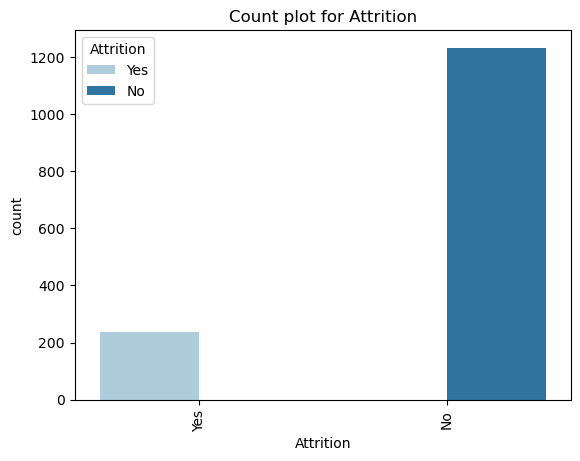

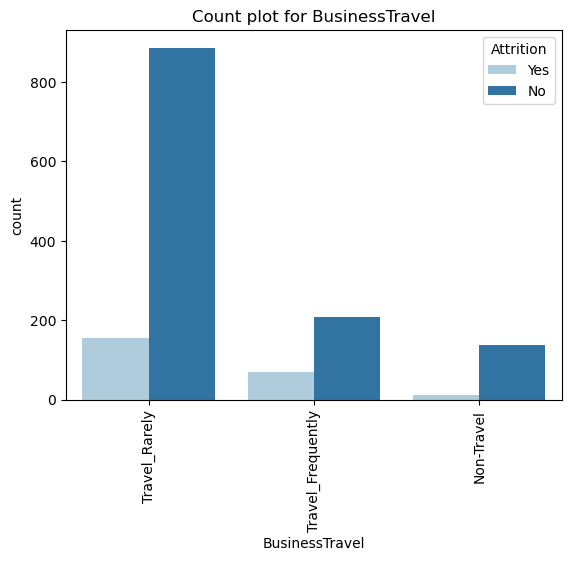

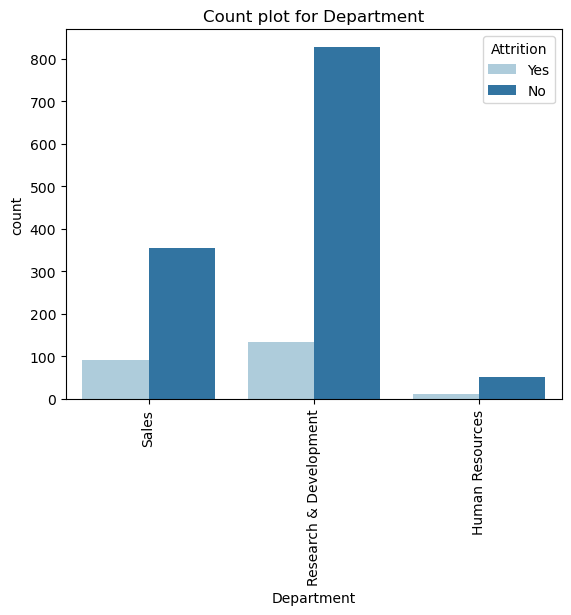

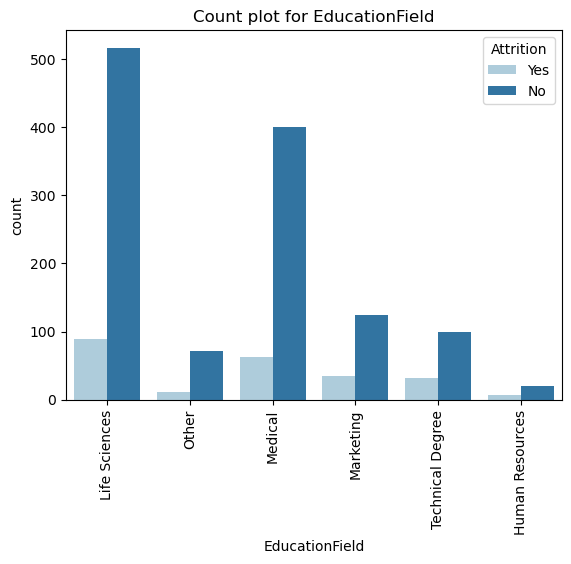

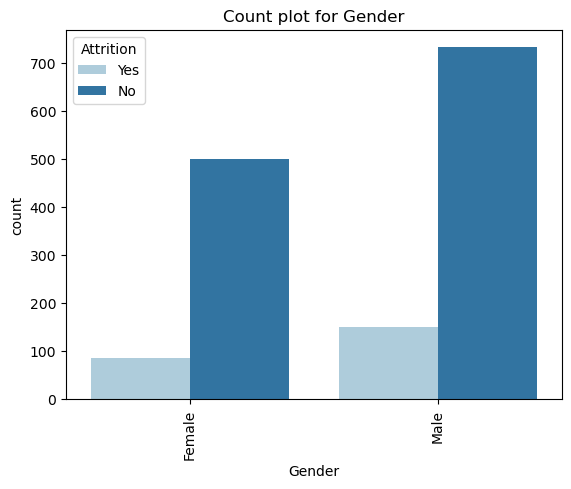

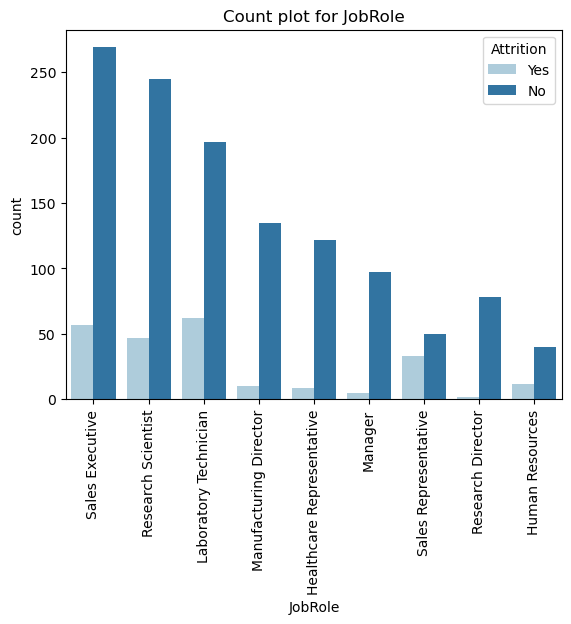

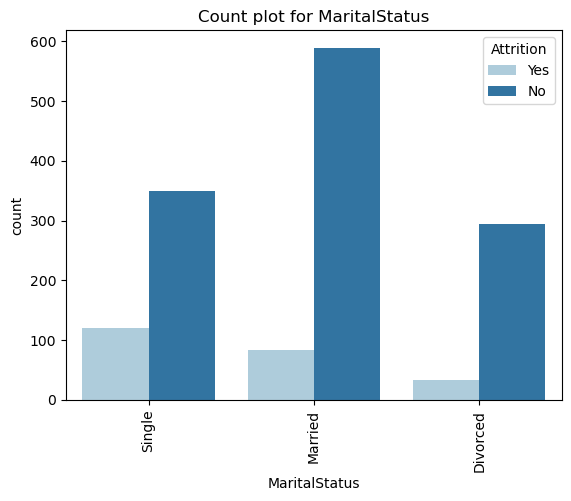

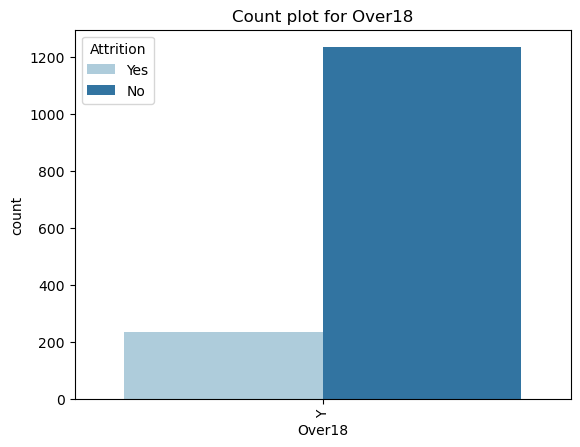

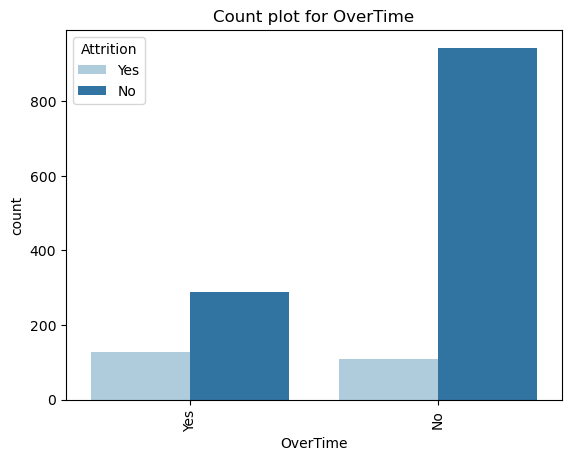

In [78]:
for cols in categorical_features:
    sns.color_palette('Set2')
    plt.title('Count plot for '+cols)
    plt.xticks(rotation=90)
    sns.countplot(data_frame[cols],hue=data_frame['Attrition'])
    plt.show()

In [79]:
#checking out numerical features

In [80]:
discrete_features=[]
continuos_features=[]
for cols in numerical_features:
    if len(data_frame[cols].unique())>25:
        continuos_features.append(cols)
    else:
        discrete_features.append(cols)

In [81]:
data_frame[discrete_features].head()

,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1,2,3,2,4,8,11,3,1,80,0,0,1,4,0,5
1,1,1,3,2,2,2,1,23,4,4,80,1,3,3,7,1,7
2,2,1,4,2,1,3,6,15,3,2,80,0,3,3,0,0,0
3,4,1,4,3,1,3,1,11,3,3,80,0,3,3,7,3,0
4,1,1,1,3,1,2,9,12,3,4,80,1,3,3,2,2,2


In [82]:
data_frame[continuos_features].head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,41,1102,1,1,94,5993,19479,8,6
1,49,279,8,2,61,5130,24907,10,10
2,37,1373,2,4,92,2090,2396,7,0
3,33,1392,3,5,56,2909,23159,8,8
4,27,591,2,7,40,3468,16632,6,2


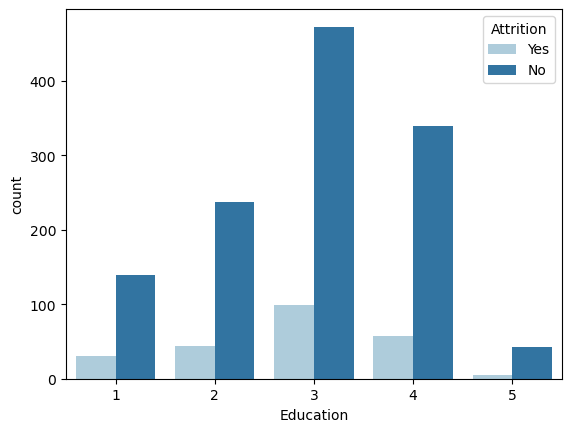

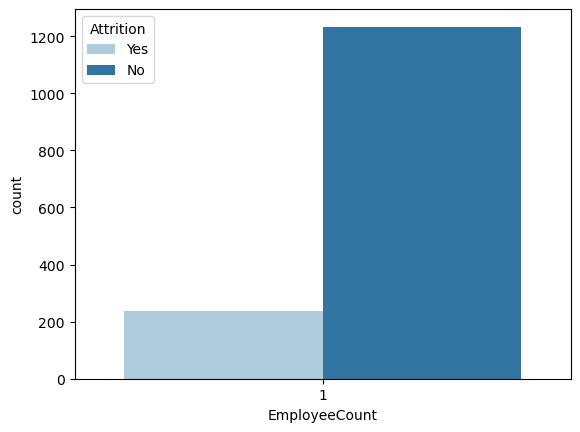

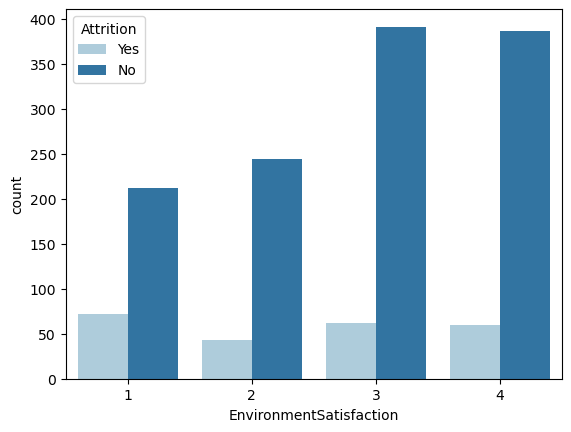

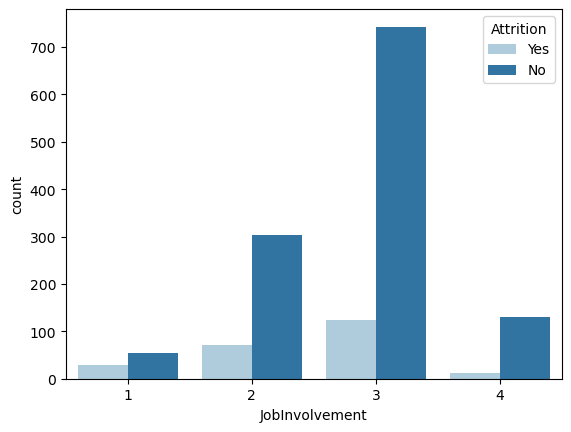

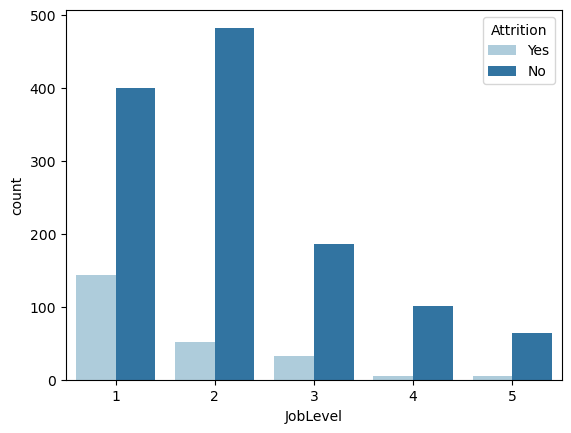

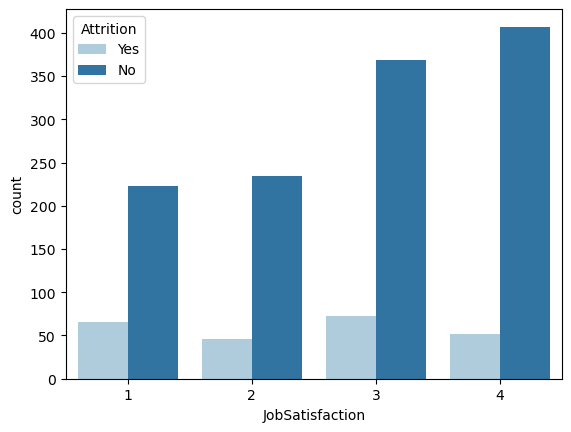

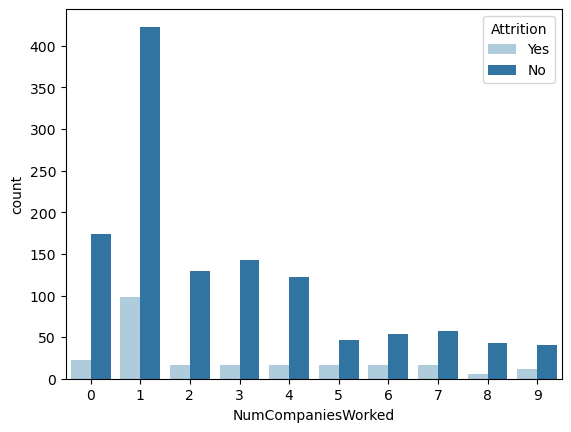

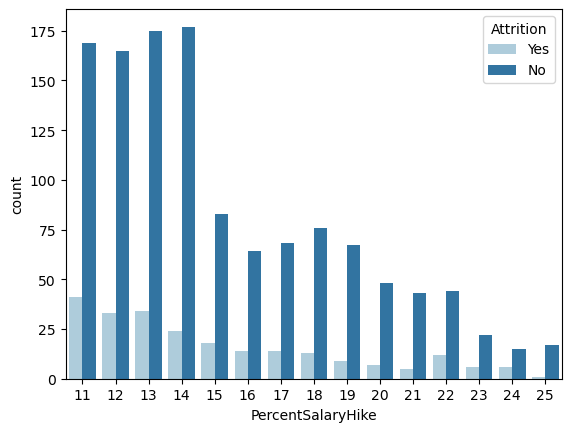

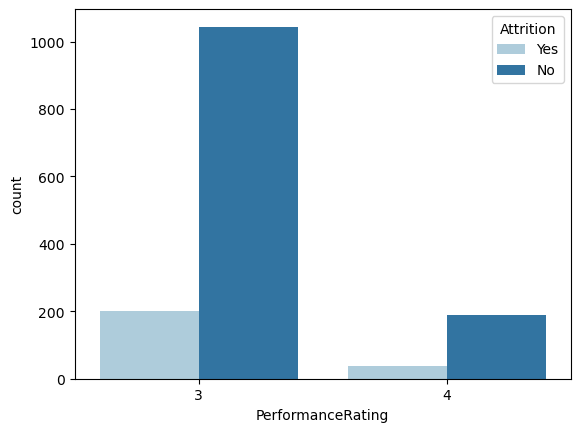

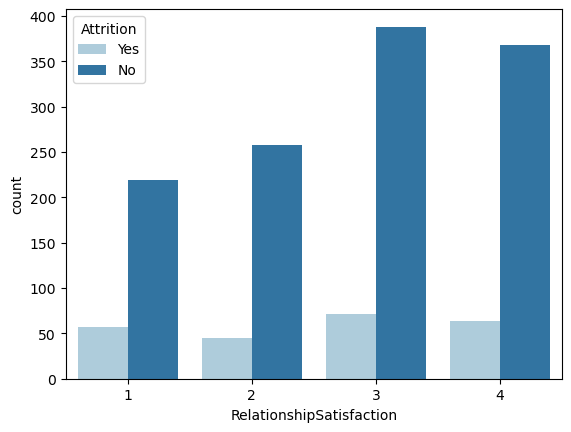

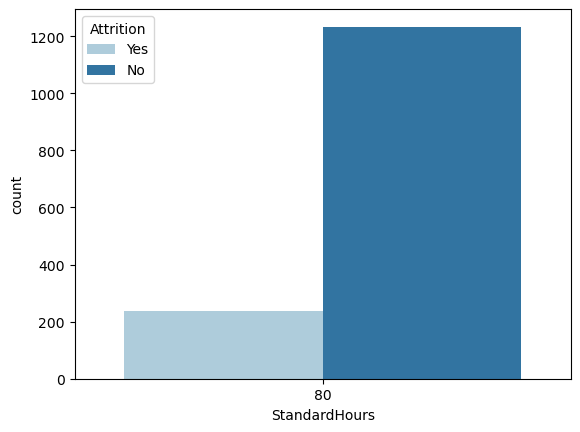

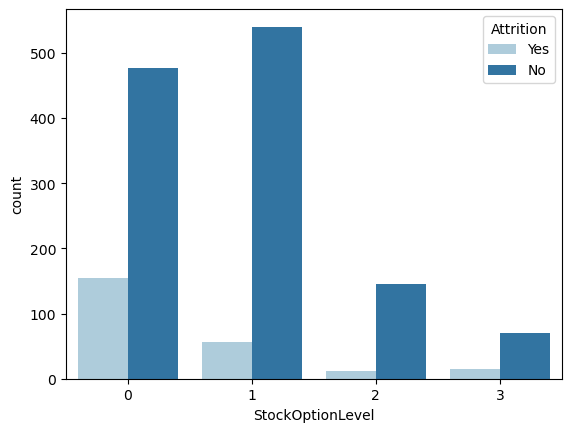

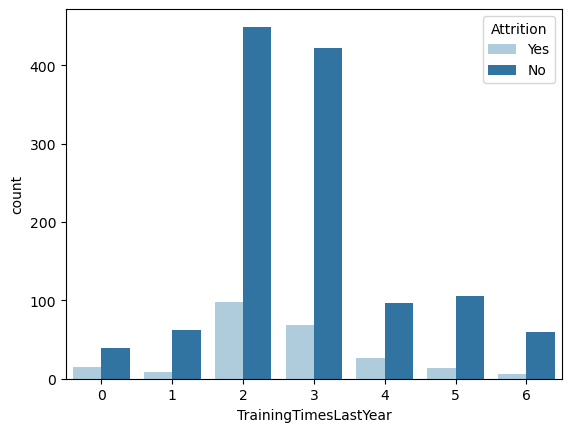

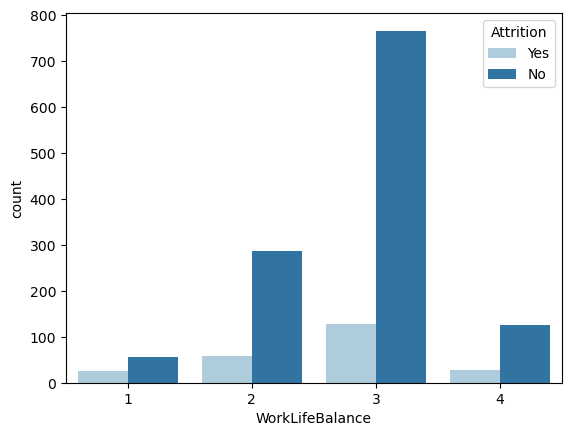

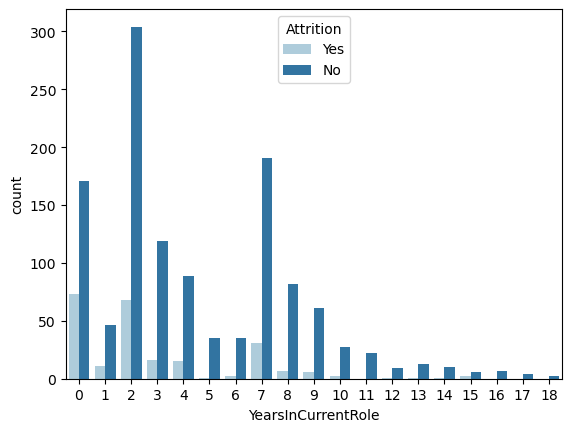

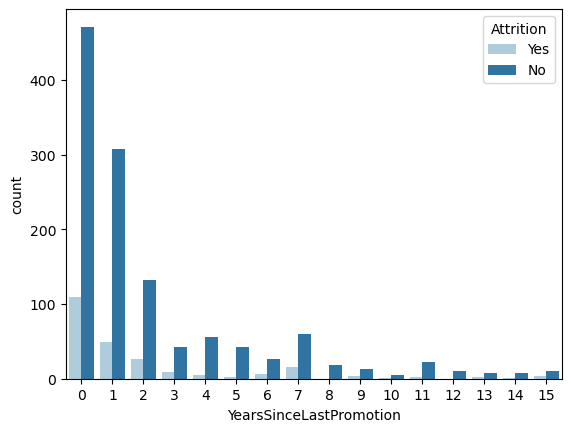

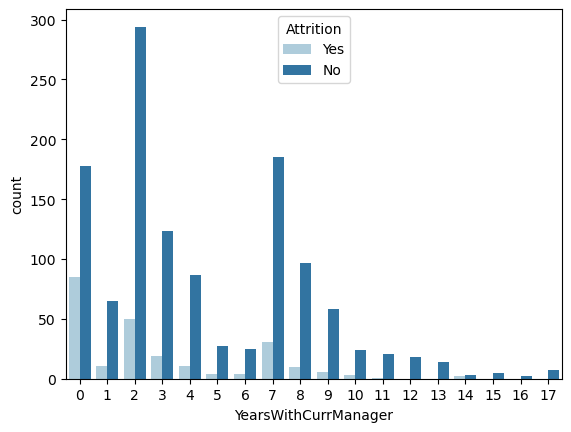

In [83]:
for cols in discrete_features:
    sns.set_palette("Paired")
    sns.countplot(data_frame[cols],hue=data_frame['Attrition'])
    plt.show()

In [84]:
#finding the length of unique values in continuos features.
for cols in continuos_features:
    print(cols,' has ',len(data_frame[cols].unique()),' unique values')

Age  has  43  unique values
DailyRate  has  886  unique values
DistanceFromHome  has  29  unique values
EmployeeNumber  has  1470  unique values
HourlyRate  has  71  unique values
MonthlyIncome  has  1349  unique values
MonthlyRate  has  1427  unique values
TotalWorkingYears  has  40  unique values
YearsAtCompany  has  37  unique values


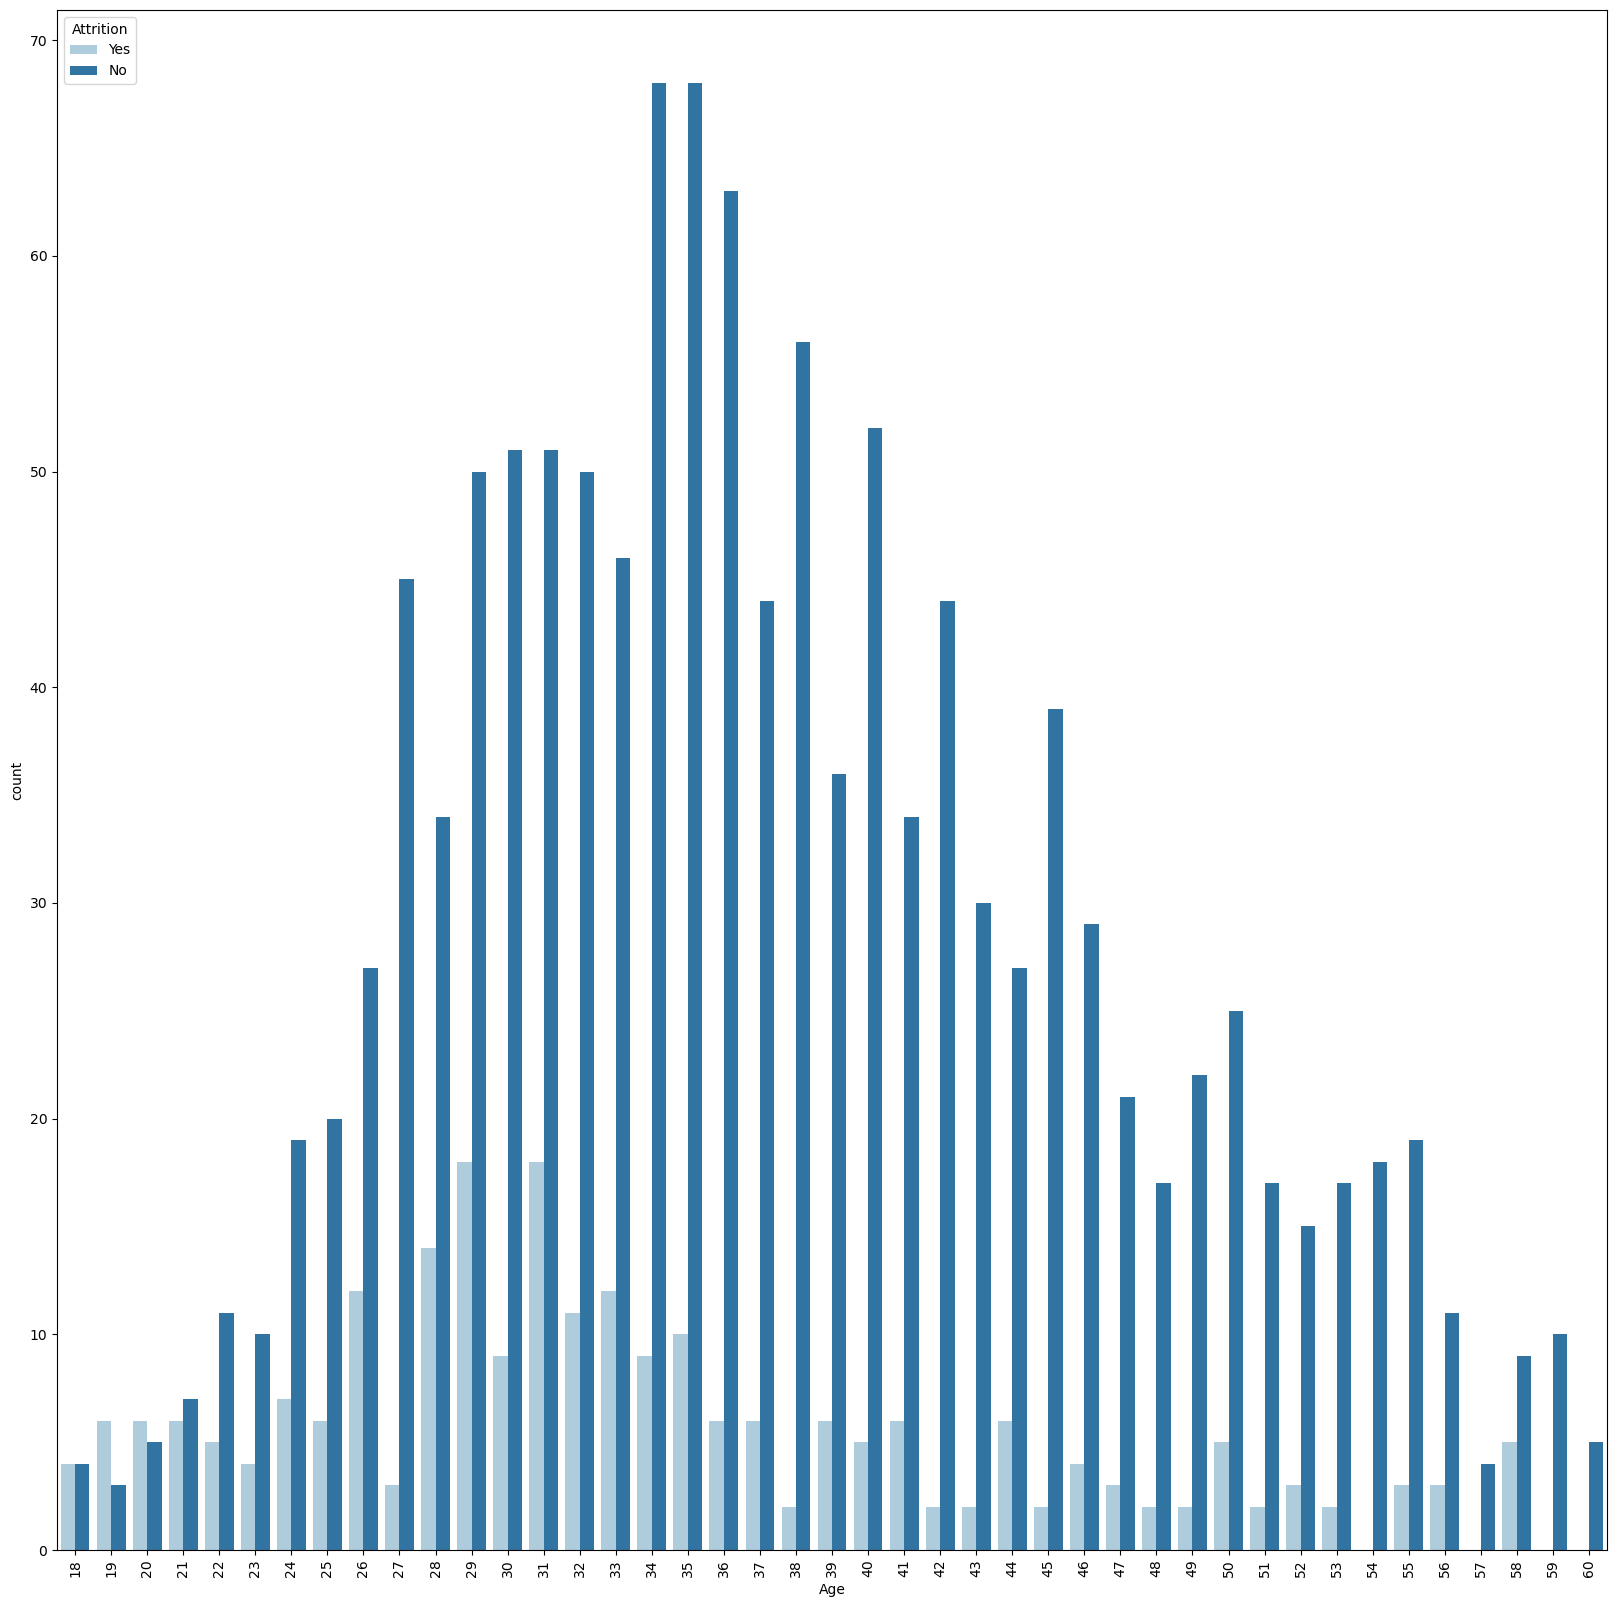

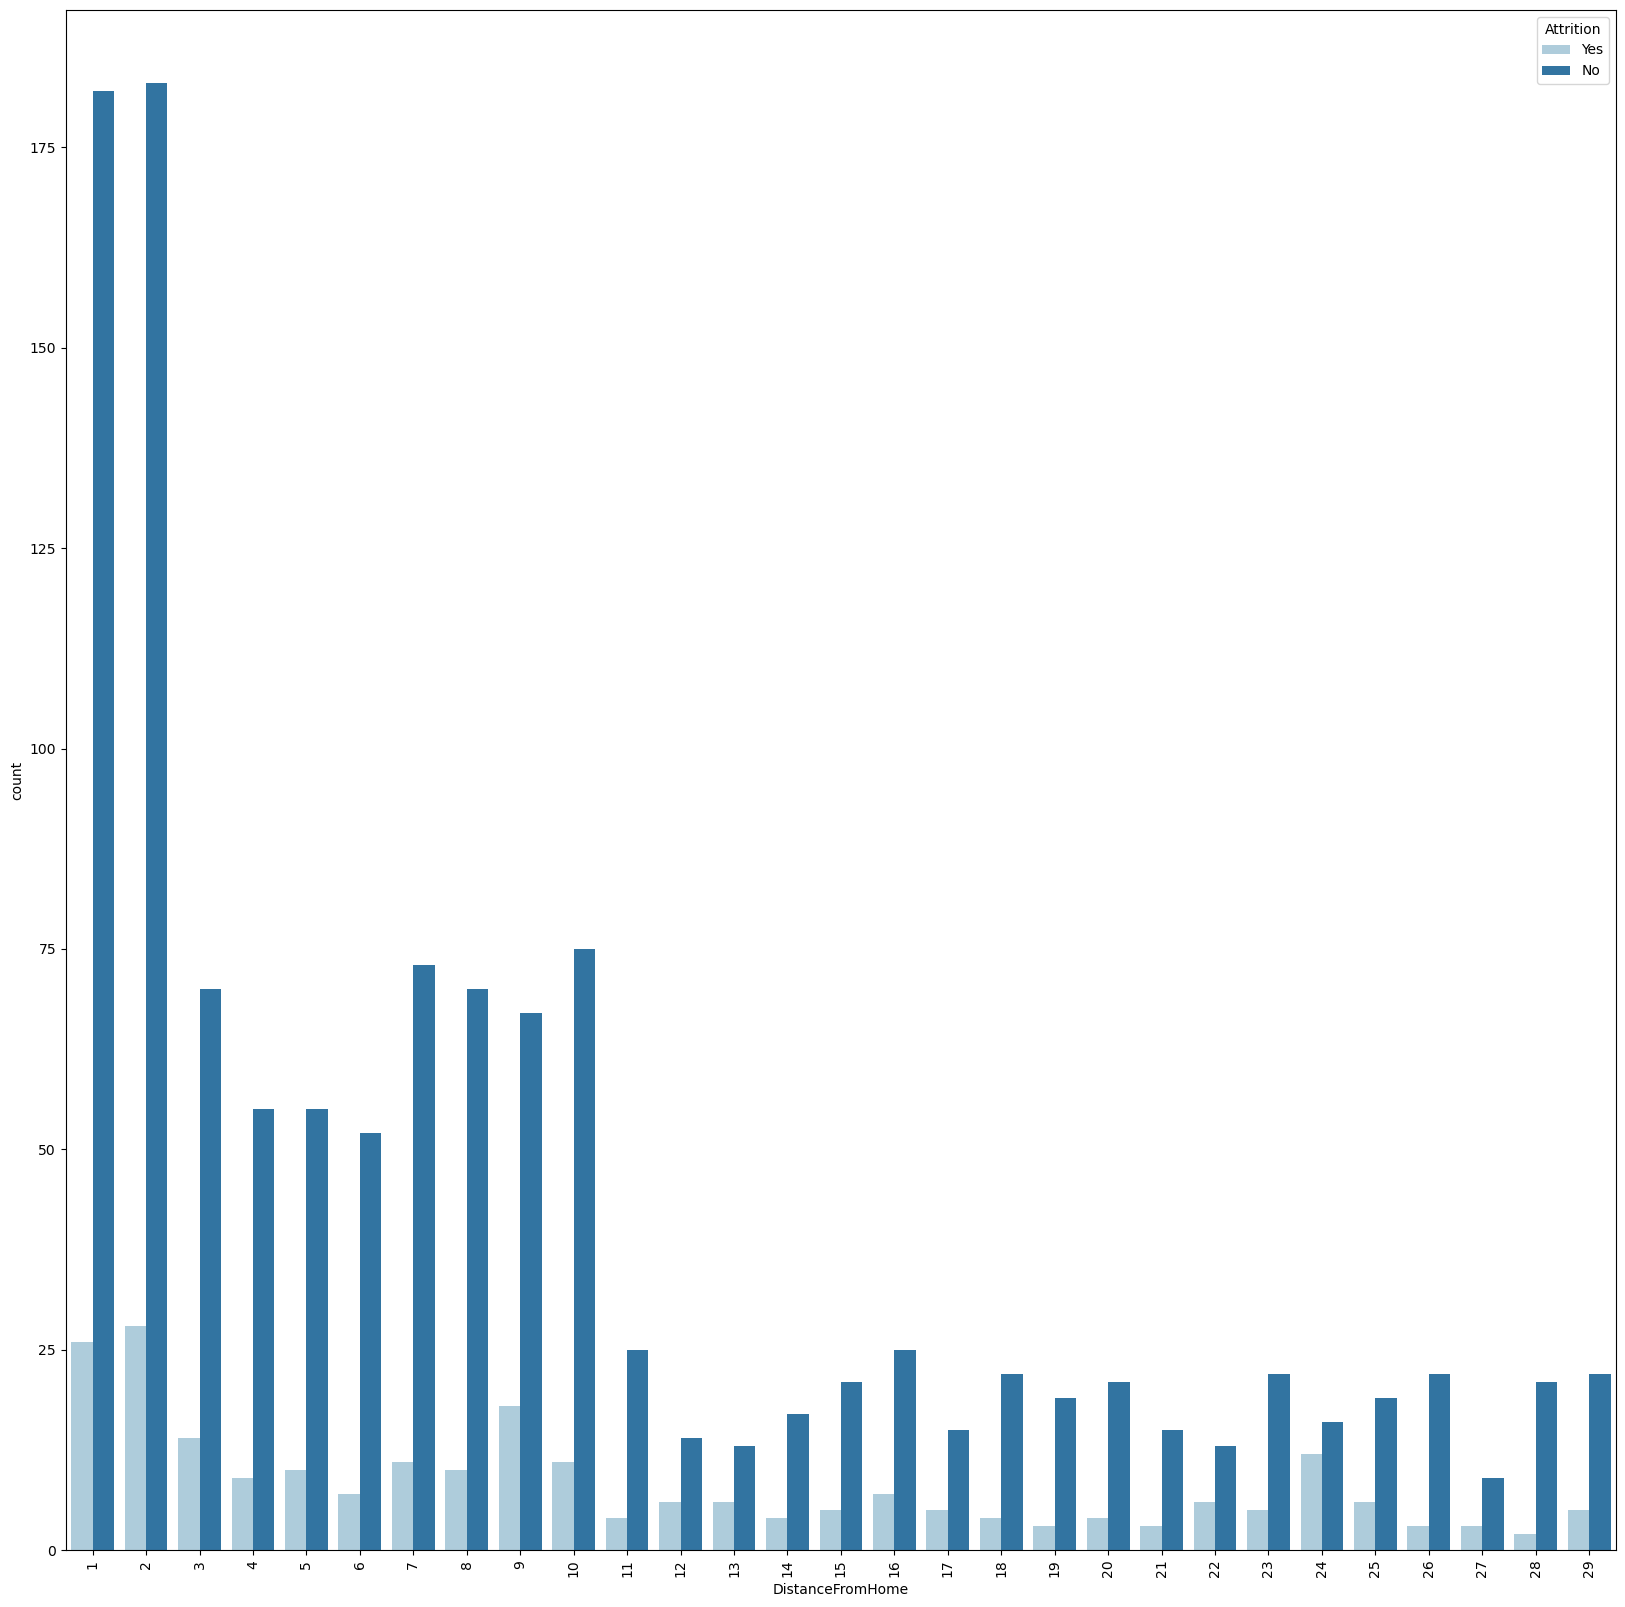

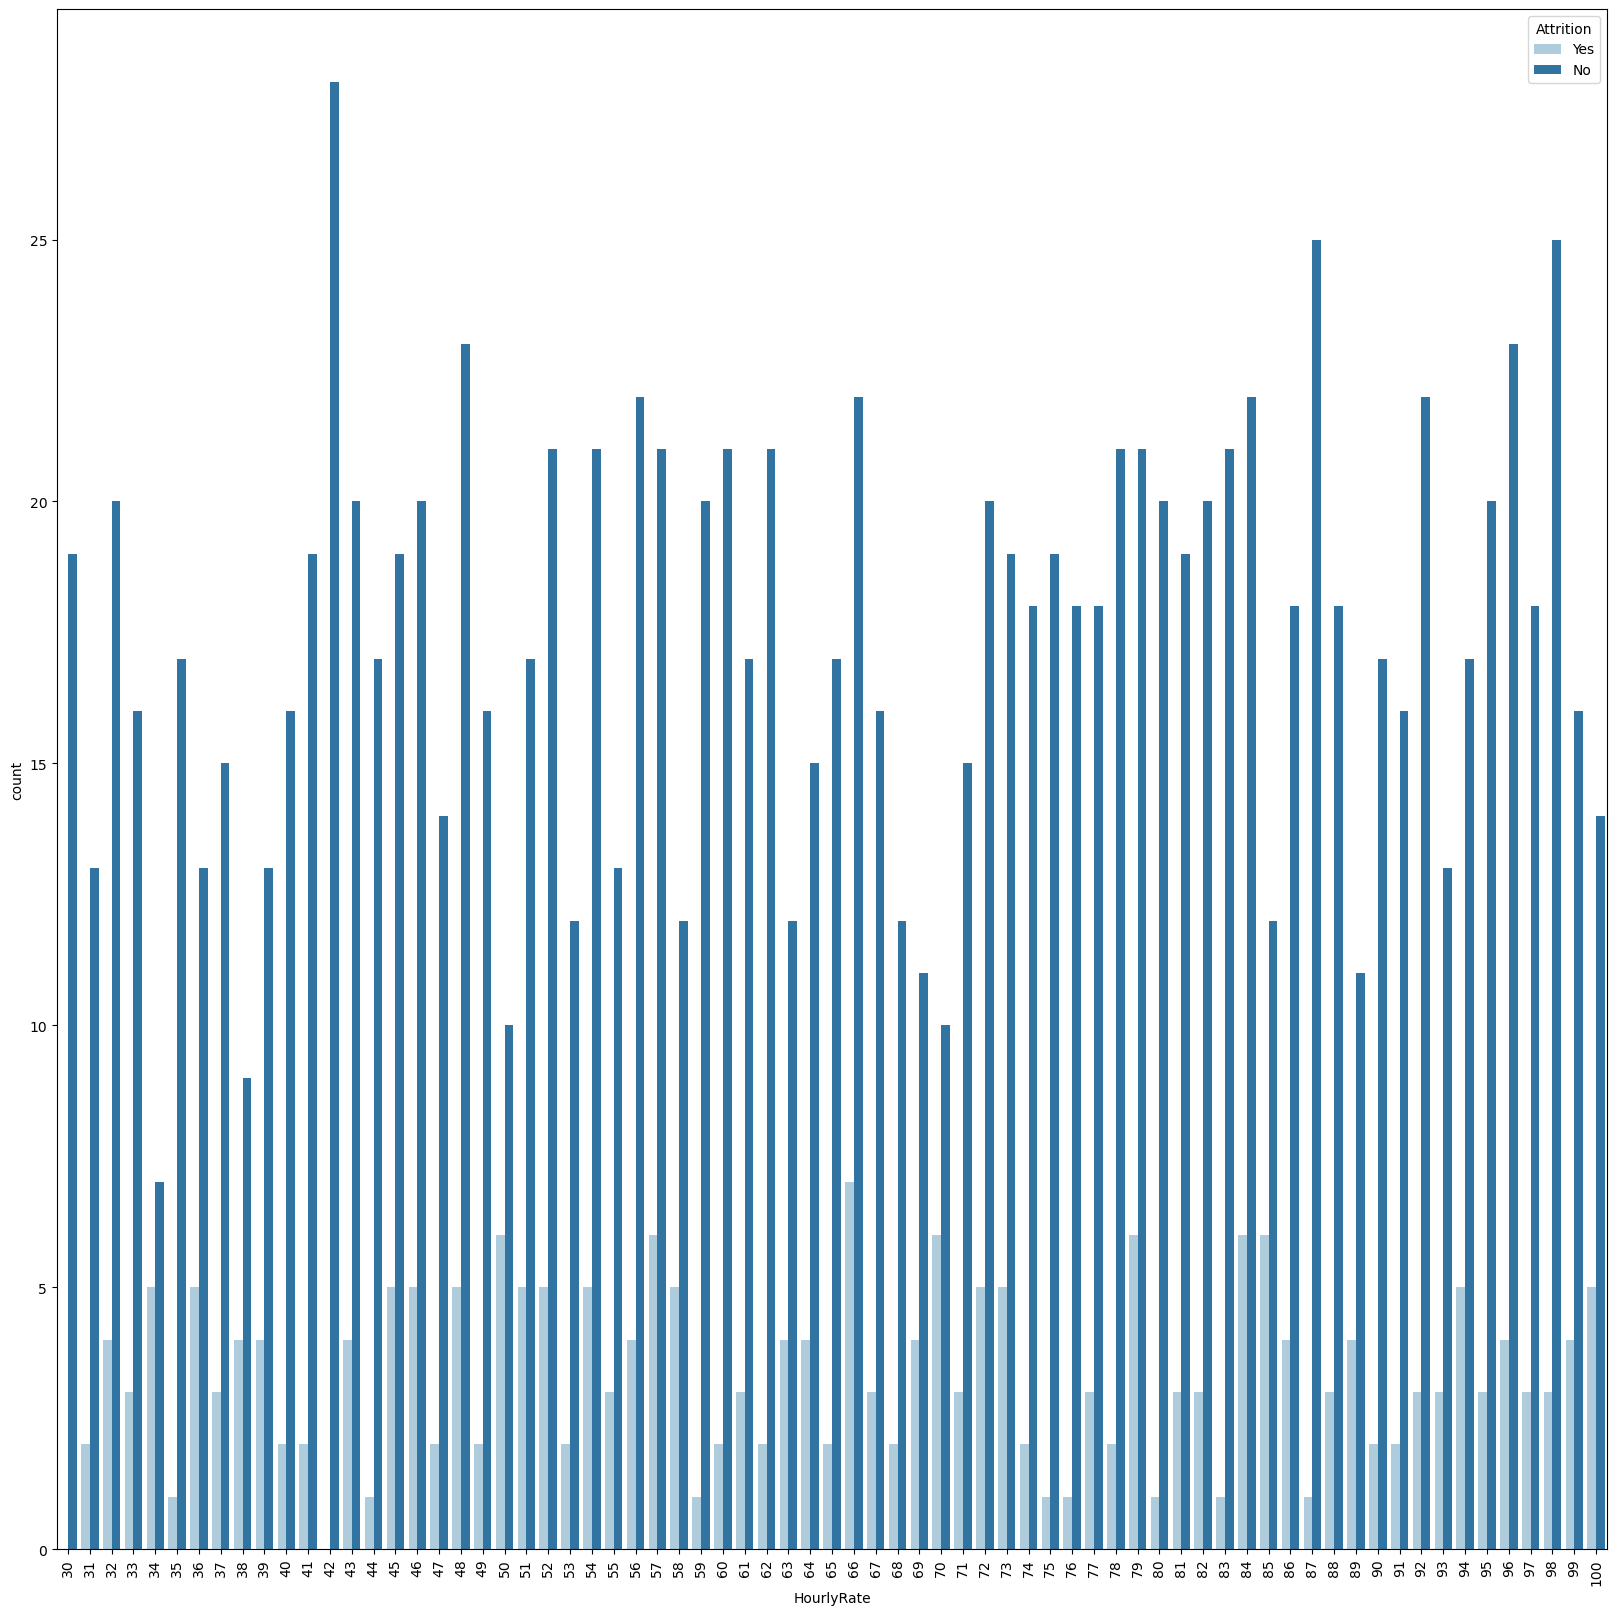

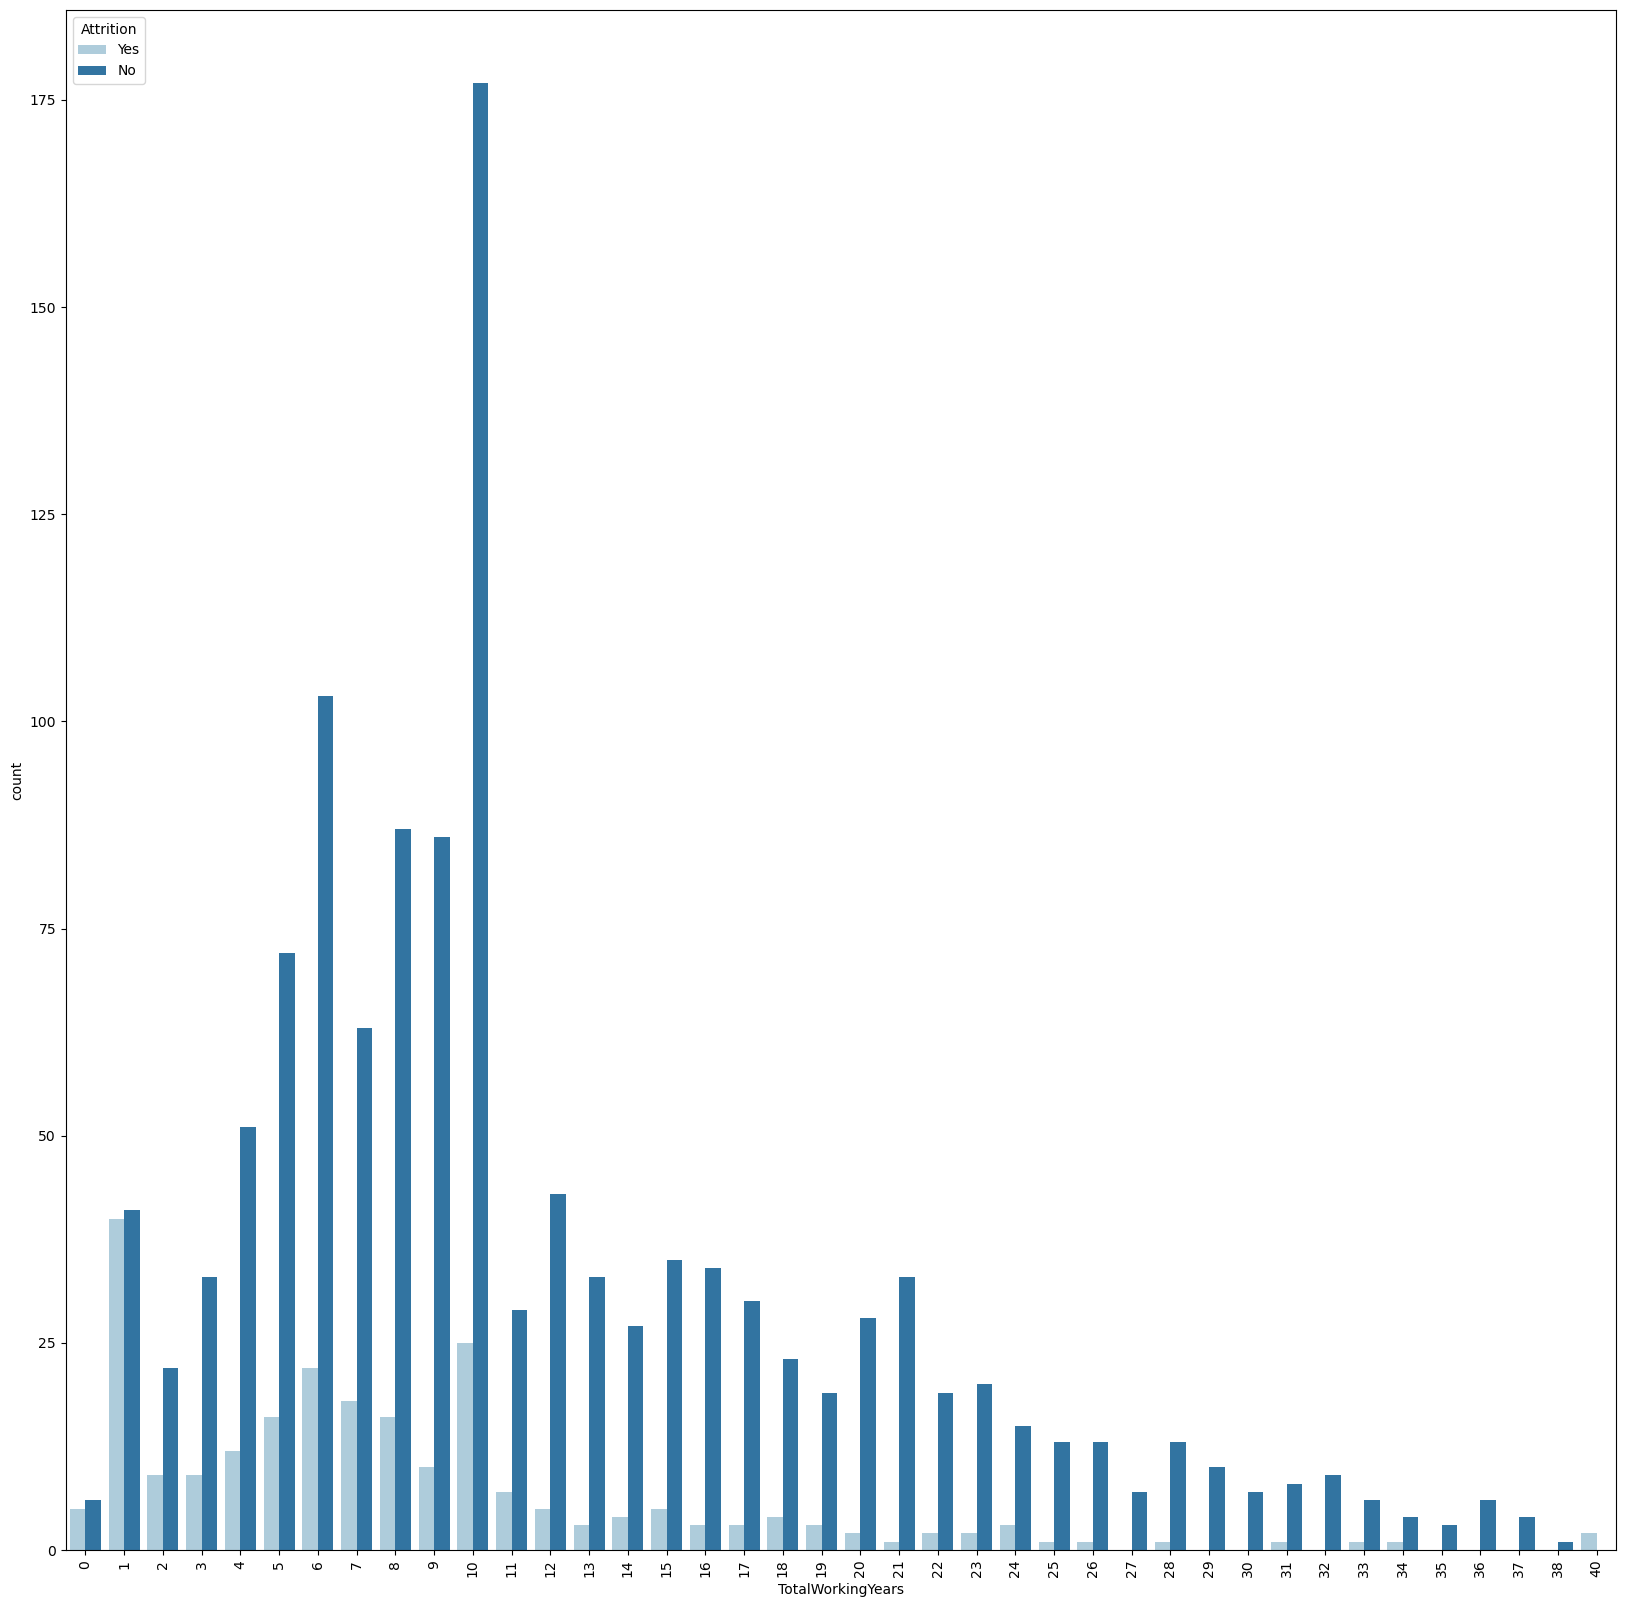

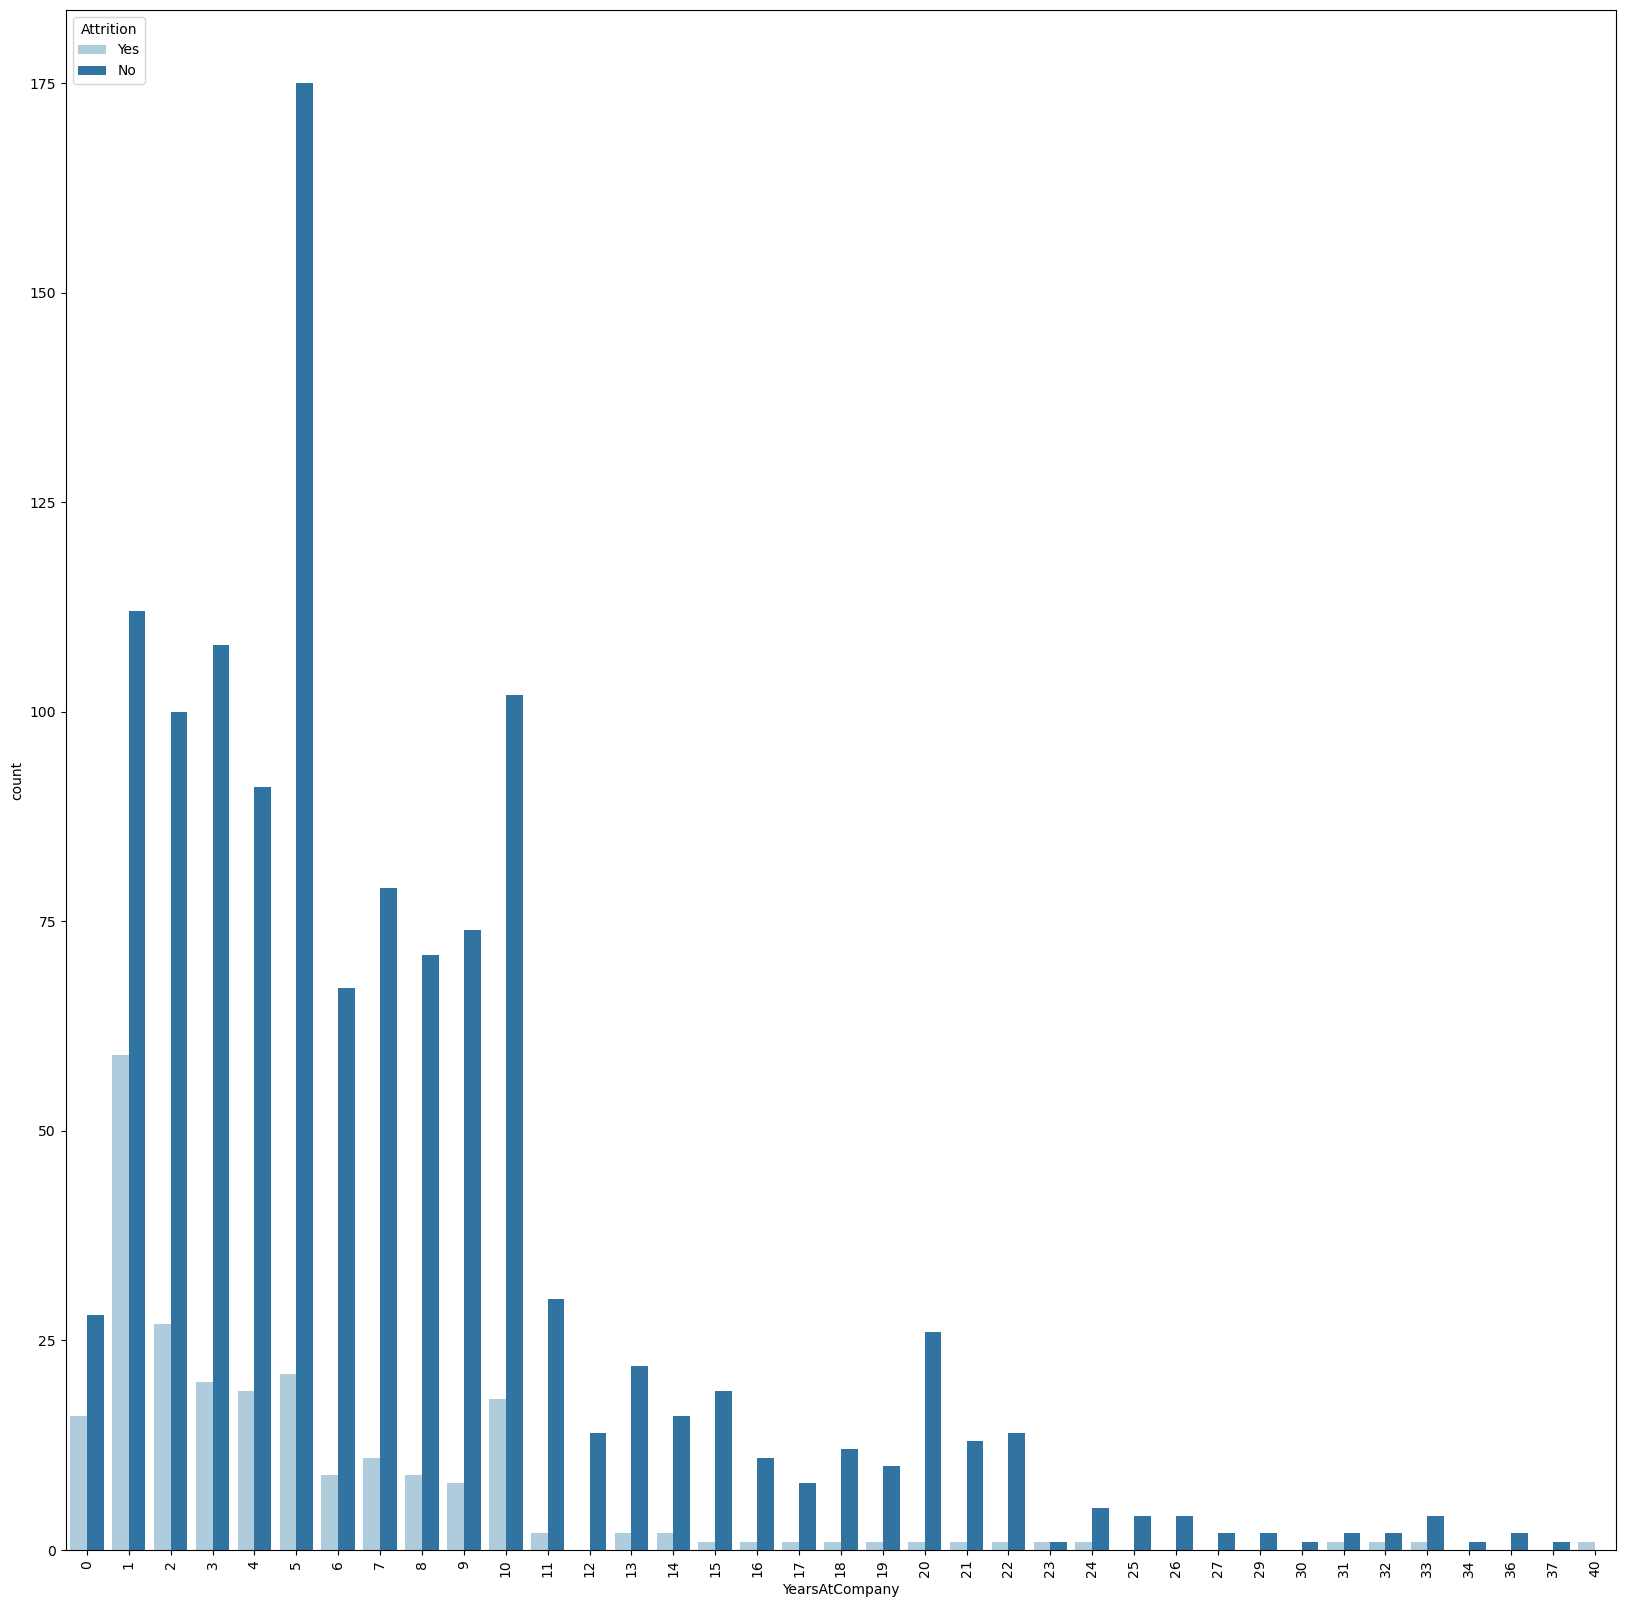

In [94]:
for cols in continuos_features:
    if len(data_frame[cols].unique())<101:
        plt.figure(figsize=(20,20))
        sns.countplot(data_frame[cols],hue=data_frame['Attrition'])
        plt.xticks(rotation=90)
        plt.show()

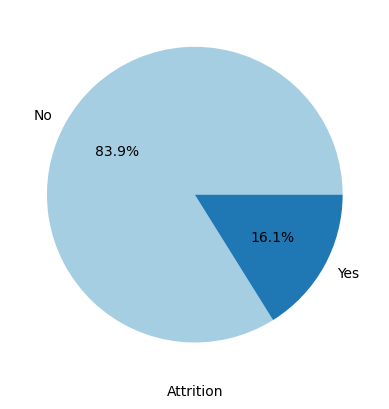

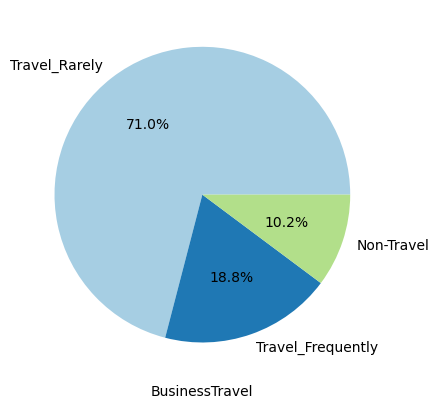

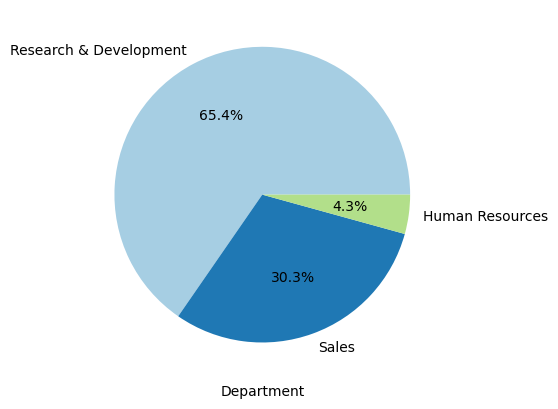

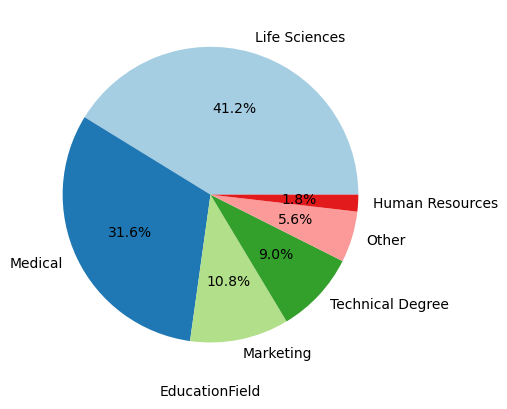

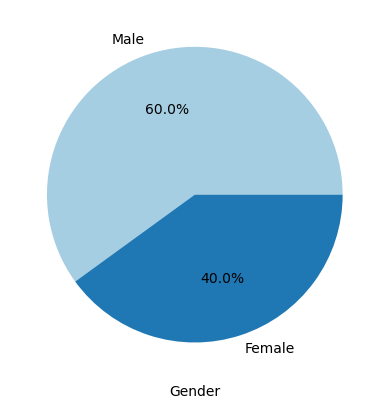

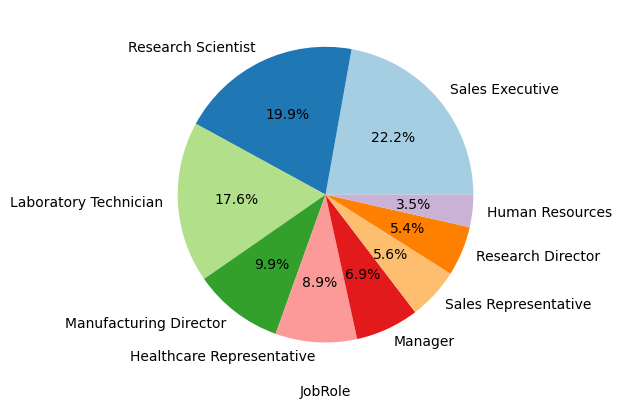

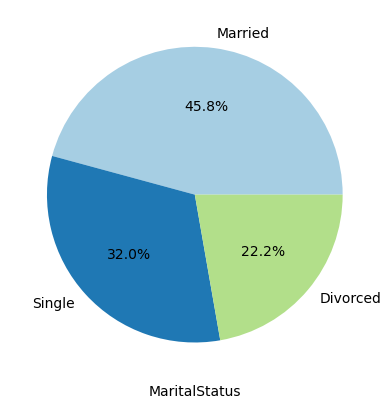

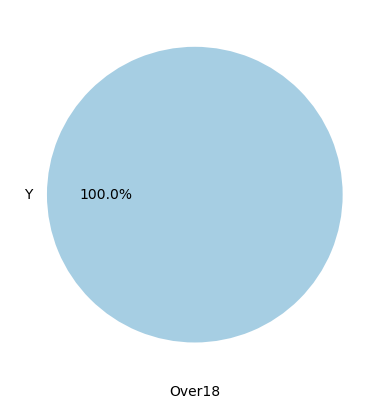

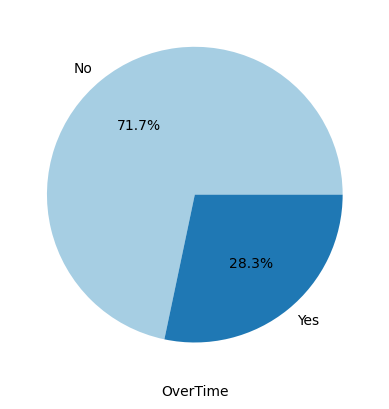

In [106]:
#divisions of each portion in categorical features.
for cols in categorical_features:
    plt.pie(x=data_frame[cols].value_counts().values,labels=data_frame[cols].value_counts().index,autopct="%1.1f%%")
    plt.xlabel(cols)
    plt.show()